In [1]:
import pyvista
from pyvista import examples
import numpy as np
import vtk

# Overview of PyVista

This notebook demos the examples present directly in the PyVista package and helps new users learn how to get started using PyVista. 

This notebook is outlined in a manner that builds up an understanding of how PyVista wraps VTK data objects so that we can show how to use the PyVista objects then demostrate how those PyVista objects are plotted.

-----

## Getting Started

Do you have some VTK data objects or VTK data files that you'd like to use in a Pythonic manner? Then go ahead and load your data file with its appriate class! The classes available in PyVista correspond to VTK classes in the following way:

| PyVista Class | `vtk` Class |
|--------------|-------------|
|`pyvista.PolyData`|`vtk.vtkPolyData`|
|`pyvista.StructuredGrid`|`vtk.vtkStructuredGrid`|
|`pyvista.UnstructuredGrid`|`vtk.vtkUnstructuredGrid`|
|`pyvista.UniformGrid`|`vtk.vtkImageData`|
|`pyvista.RectilinearGrid`|`vtk.vtkRectilinearGrid`|

If you want to load a data file, then go ahead and use PyVista's `read` method to read your file. This function will handle figuing out what kind of data file you have and return the appropriate PyVista object for you:

```py
import pyvista
filename = 'myfile.vtk'
data = pyvista.read(filename)
```

We already have some VTK files under the examples directory so how about we grab that filename and demo this!

In [2]:
#NBVAL_CHECK_OUTPUT
filename = examples.uniformfile
data = pyvista.read(filename)
type(data)

pyvista.UniformGrid

Awesome! Now we have a `UniformGrid` ready to use (this is essentially just a wrapped `vtkImageData` object, so you could still pass this on to VTK algorithms.

*So why do I want a PyVista wrapped object?* **First**, these allow you to access attributes of the VTK data object in a more Pythonic manner. For example:

In [3]:
#NBVAL_CHECK_OUTPUT
data.n_cells

729

In [4]:
#NBVAL_CHECK_OUTPUT
data.n_points

1000

In [5]:
#NBVAL_CHECK_OUTPUT
data.n_arrays

2

In [6]:
data.points

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 2.],
       ...,
       [9., 9., 7.],
       [9., 9., 8.],
       [9., 9., 9.]])

**Second**, PyVista has HTML representation for the VTK data objects that will give you a whole lot more insight into the data object that VTK's typicall printing of the class name and memory address:

In [7]:
data

(UniformGrid)0x1146027c8

**And third**, PyVista has functions to handle plotting these objects right out of the box. You can simply call the `plot()` method on any PyVista object and a rendering will be produced for you!
You can also pass the scalar name that you'd like to view and PyVista will handle coloring your dataset by that array:

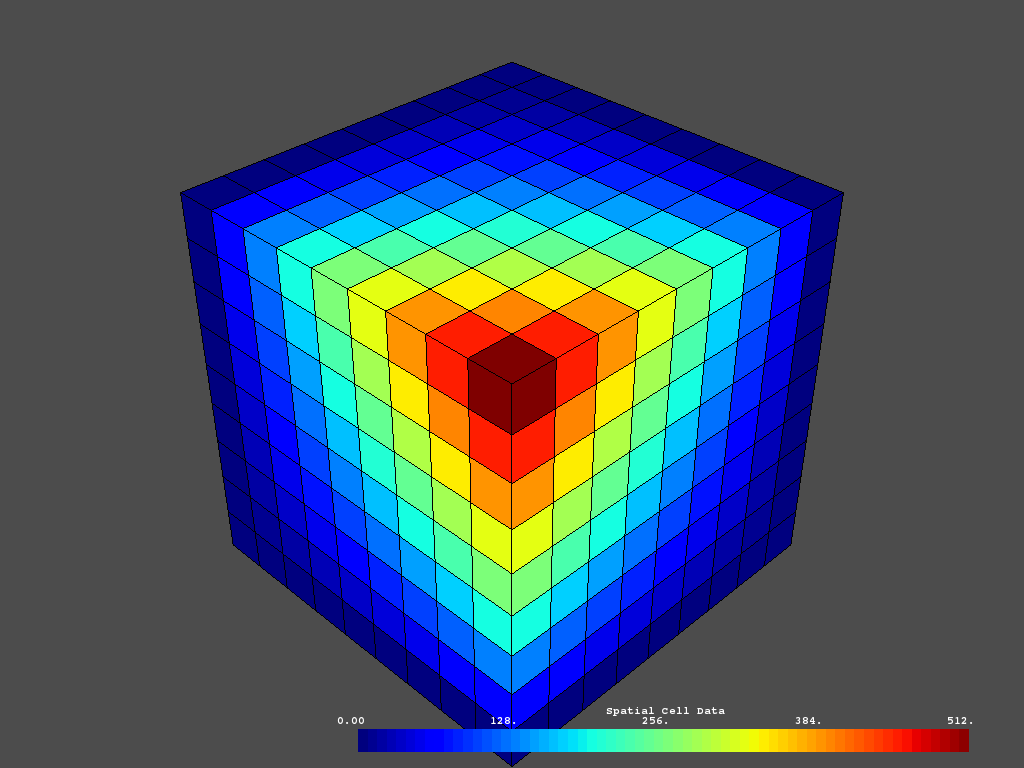

In [8]:
data.plot(scalars='Spatial Cell Data')

-----

## Creating new VTK objects on the fly

Here is a demo on how to quickly create new VTK data objects using PyVista

### vtkPolyData

In [9]:
x = np.random.uniform(0, 10, 100)
y = np.random.uniform(0, 10, 100)
z = np.random.uniform(0, 10, 100)

mesh = pyvista.PolyData(np.c_[x,y,z])
mesh

vtkPolyData,Values
N Cells,100
N Points,100
X Bounds,"6.179e-03, 9.918e+00"
Y Bounds,"2.037e-01, 9.997e+00"
Z Bounds,"5.546e-02, 9.925e+00"


### vtkStructuredGrid

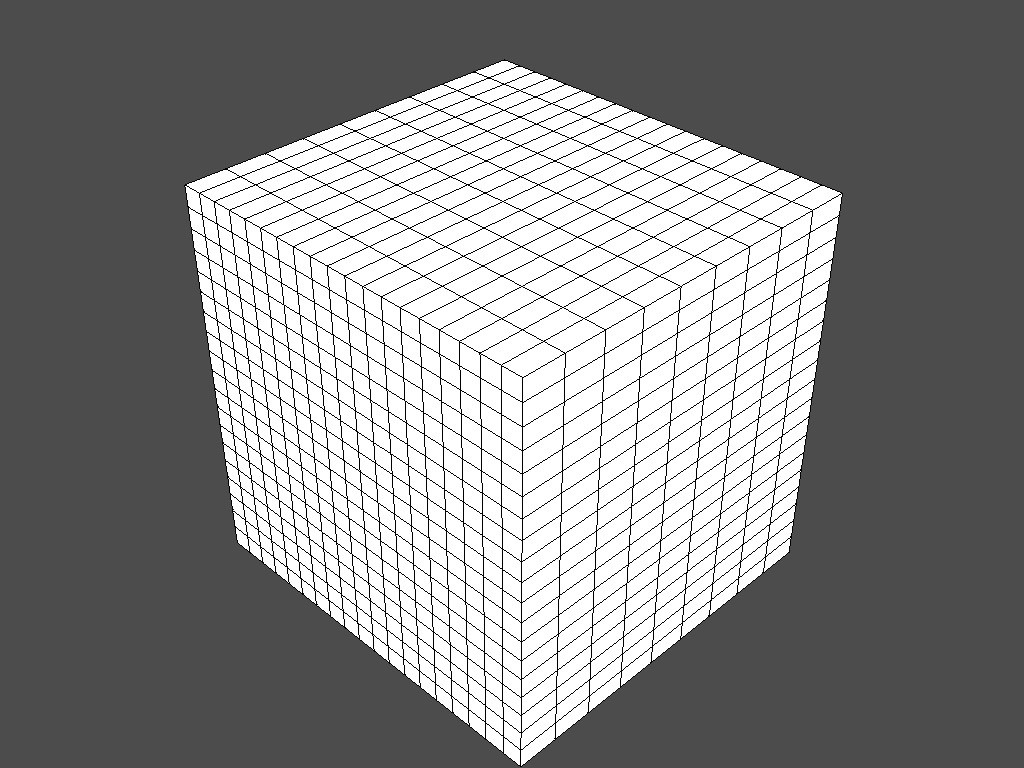

In [10]:
xrng = np.arange(-10, 10, 2)
yrng = np.arange(-10, 10, 1)
zrng = np.arange(-10, 10, 0.5)
x, y, z = np.meshgrid(xrng, yrng, zrng)
grid = pyvista.StructuredGrid(x, y, z)
grid.plot()

### vtkUnstructuredGrid

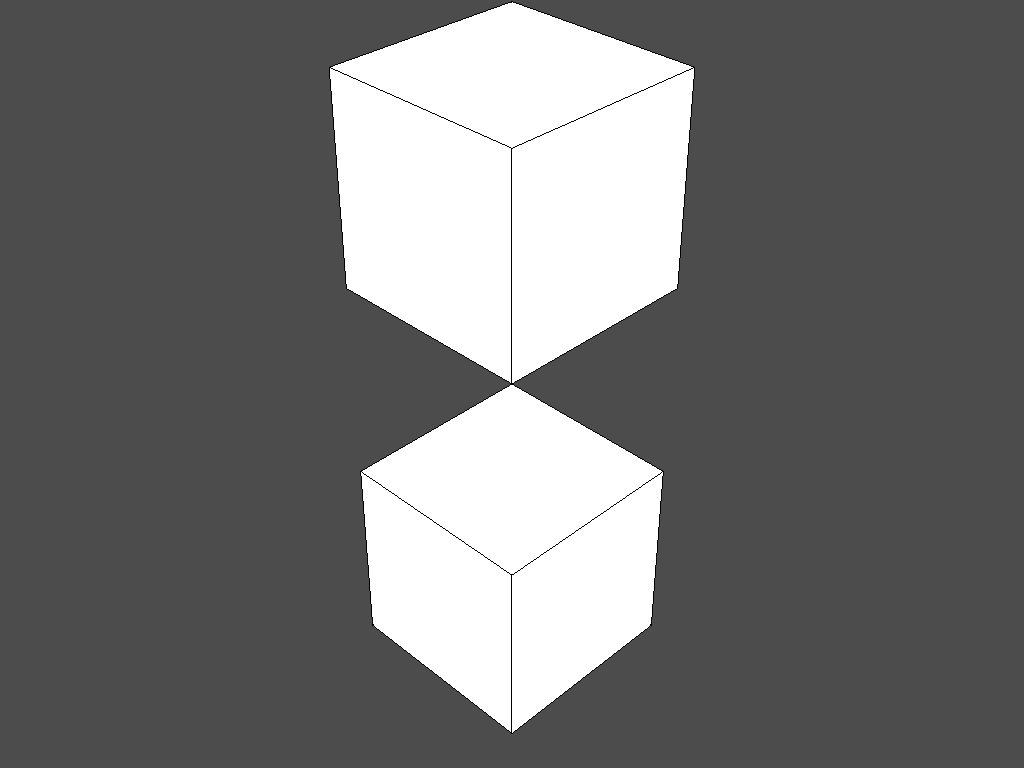

In [11]:
offset = np.array([0, 9])
cells = np.array([8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15])
cell_type = np.array([vtk.VTK_HEXAHEDRON, vtk.VTK_HEXAHEDRON], np.int8)

cell1 = np.array([[0, 0, 0],
                  [1, 0, 0],
                  [1, 1, 0],
                  [0, 1, 0],
                  [0, 0, 1],
                  [1, 0, 1],
                  [1, 1, 1],
                  [0, 1, 1]])

cell2 = np.array([[0, 0, 2],
                  [1, 0, 2],
                  [1, 1, 2],
                  [0, 1, 2],
                  [0, 0, 3],
                  [1, 0, 3],
                  [1, 1, 3],
                  [0, 1, 3]])

points = np.vstack((cell1, cell2))

grid = pyvista.UnstructuredGrid(offset, cells, cell_type, points)
grid.plot()

### vtkImageData

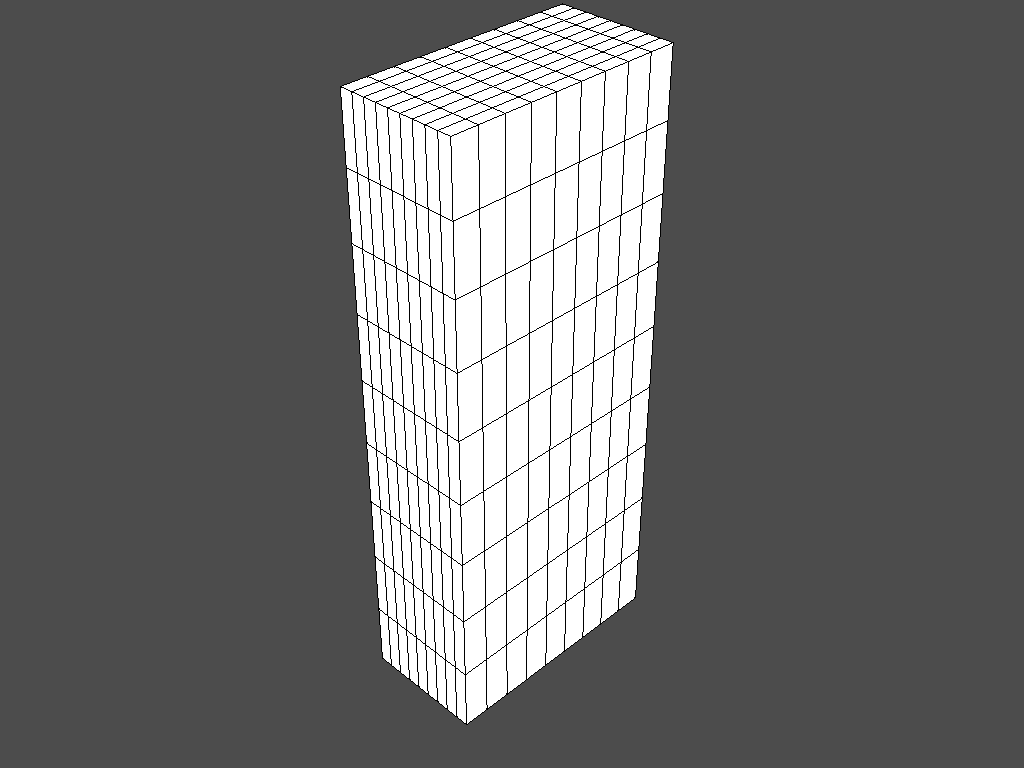

In [12]:
dims = (10, 10, 10)
grid = pyvista.UniformGrid(dims) # Using default spacing and origin
spacing = (2, 1, 5)
grid = pyvista.UniformGrid(dims, spacing) # Usign default origin
origin = (10, 35, 50)
grid = pyvista.UniformGrid(dims, spacing, origin) # Everything is specified
grid.plot()

### vtkRectilinearGrid

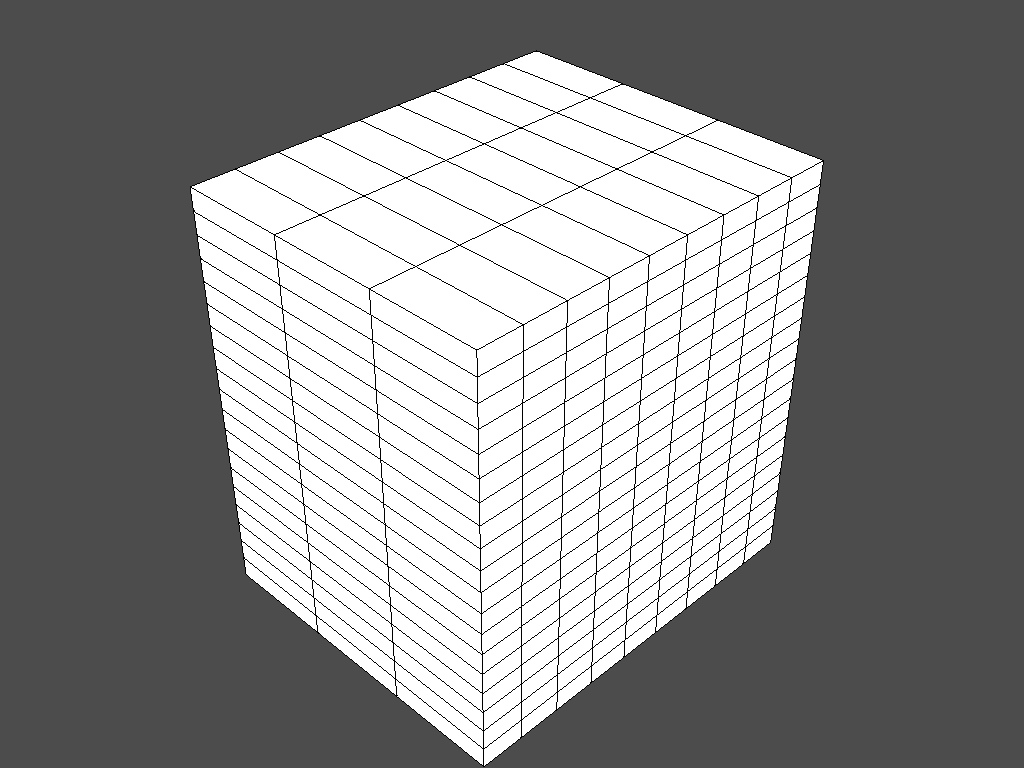

In [13]:
xrng = np.arange(-10, 10, 2)
yrng = np.arange(-10, 10, 5)
zrng = np.arange(-10, 10, 1)
grid = pyvista.RectilinearGrid(xrng, yrng, zrng)
grid.plot()